Import Library

In [132]:
import itertools
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline

(a) Generate predictor X and noise

In [2]:
np.random.seed(1)
x =np.random.normal(loc=0.0,scale=1.0,size =100)
noise = np.random.normal(loc=0.0,scale=1.0,size =100)

(b) Generate a response vector Y following the model Y =β0 +β1X+β2X2 +β3X3 +ε,

In [3]:
y = np.array(100)
y =1 + 2*x + 3*(x)**2 + 4*(x**3) + noise

(c) Use the regsubsets() function to perform best subset selection in order to choose the best model containing the predictors X,X2,...,X10 What is the best model obtained according to Cp, BIC and adjusted R squared?

In [4]:
df = pd.DataFrame({'x1':x, 'x2': x**2, 'x3': x**3, 'x4': x**4,'x5': x**5,'x6': x**6,'x7': x**7,'x8': x**8,'x9': x**9,'x10': x**10, 'y': y})

In [128]:
def combinations(r):
    # Combination generator
    iterable = range(11)
    pool = tuple(iterable)
    n = len(pool)
    return [list(pool[i] for i in indices)
            for indices in itertools.combinations(range(n), r)]

r2 = []
best_r2 = []
index_best_r2= []
results =[]
BIC = []
Adj_R_sqare = []
Cp = []
n = x.shape[0]

# Finding the best model in each r models from total p models based on R square of each model (Best subset Selection)
r =1
X = df.drop("y", axis = 1)
X = sm.add_constant(X)    
while r<=11:
    combs = combinations(r)
    for i in range(0, len(combs)):
        model = sm.OLS(df['y'], X.iloc[:,combs[i]])
        results.append(model.fit())
        results_length = len(results)
        r2.append(results[results_length-1].rsquared)
    best_r2.append(np.max(r2))
    position_best_r2 = len(best_r2)-1
    
    index_best_r2.append(r2.index(best_r2[position_best_r2]))
    position_index_best_r2 = len(index_best_r2)-1
    influence = results[index_best_r2[position_index_best_r2]].get_influence()
    hat_matrix_diag = influence.hat_matrix_diag
    BIC.append(results[index_best_r2[position_index_best_r2]].bic)
    Adj_R_sqare.append(results[index_best_r2[position_index_best_r2]].rsquared_adj)
    Cp.append((results[index_best_r2[position_index_best_r2]].ssr / results[index_best_r2[position_index_best_r2]].df_resid) + 2 * np.sum(hat_matrix_diag) / n)
    r +=1
#     print(results[index_best_r2[position_index_best_r2]].summary())

4
[615.872701466739, 386.34070665807883, 350.31304548437055, 285.734557452425, 284.24919772206306, 288.4103845052281, 292.45093482487346, 295.185247539046, 299.2154816452974, 303.5096730757913, 307.65418245972705]
4
[0.8448082156204695, 0.9849188986736169, 0.9898510466825509, 0.9943387151486724, 0.9946171559264938, 0.9945839912673199, 0.9945565761969893, 0.9945993971845333, 0.9945713510568609, 0.9945280757435573, 0.9944920250618318]
4
[26.724940406788978, 2.635111035033169, 1.8064016836803034, 0.9634537786254284, 0.9400025897611272, 0.9651779950328127, 0.9894561665275884, 1.0027738736835248, 1.0271505228221414, 1.0539037140257708, 1.0795294883559712]


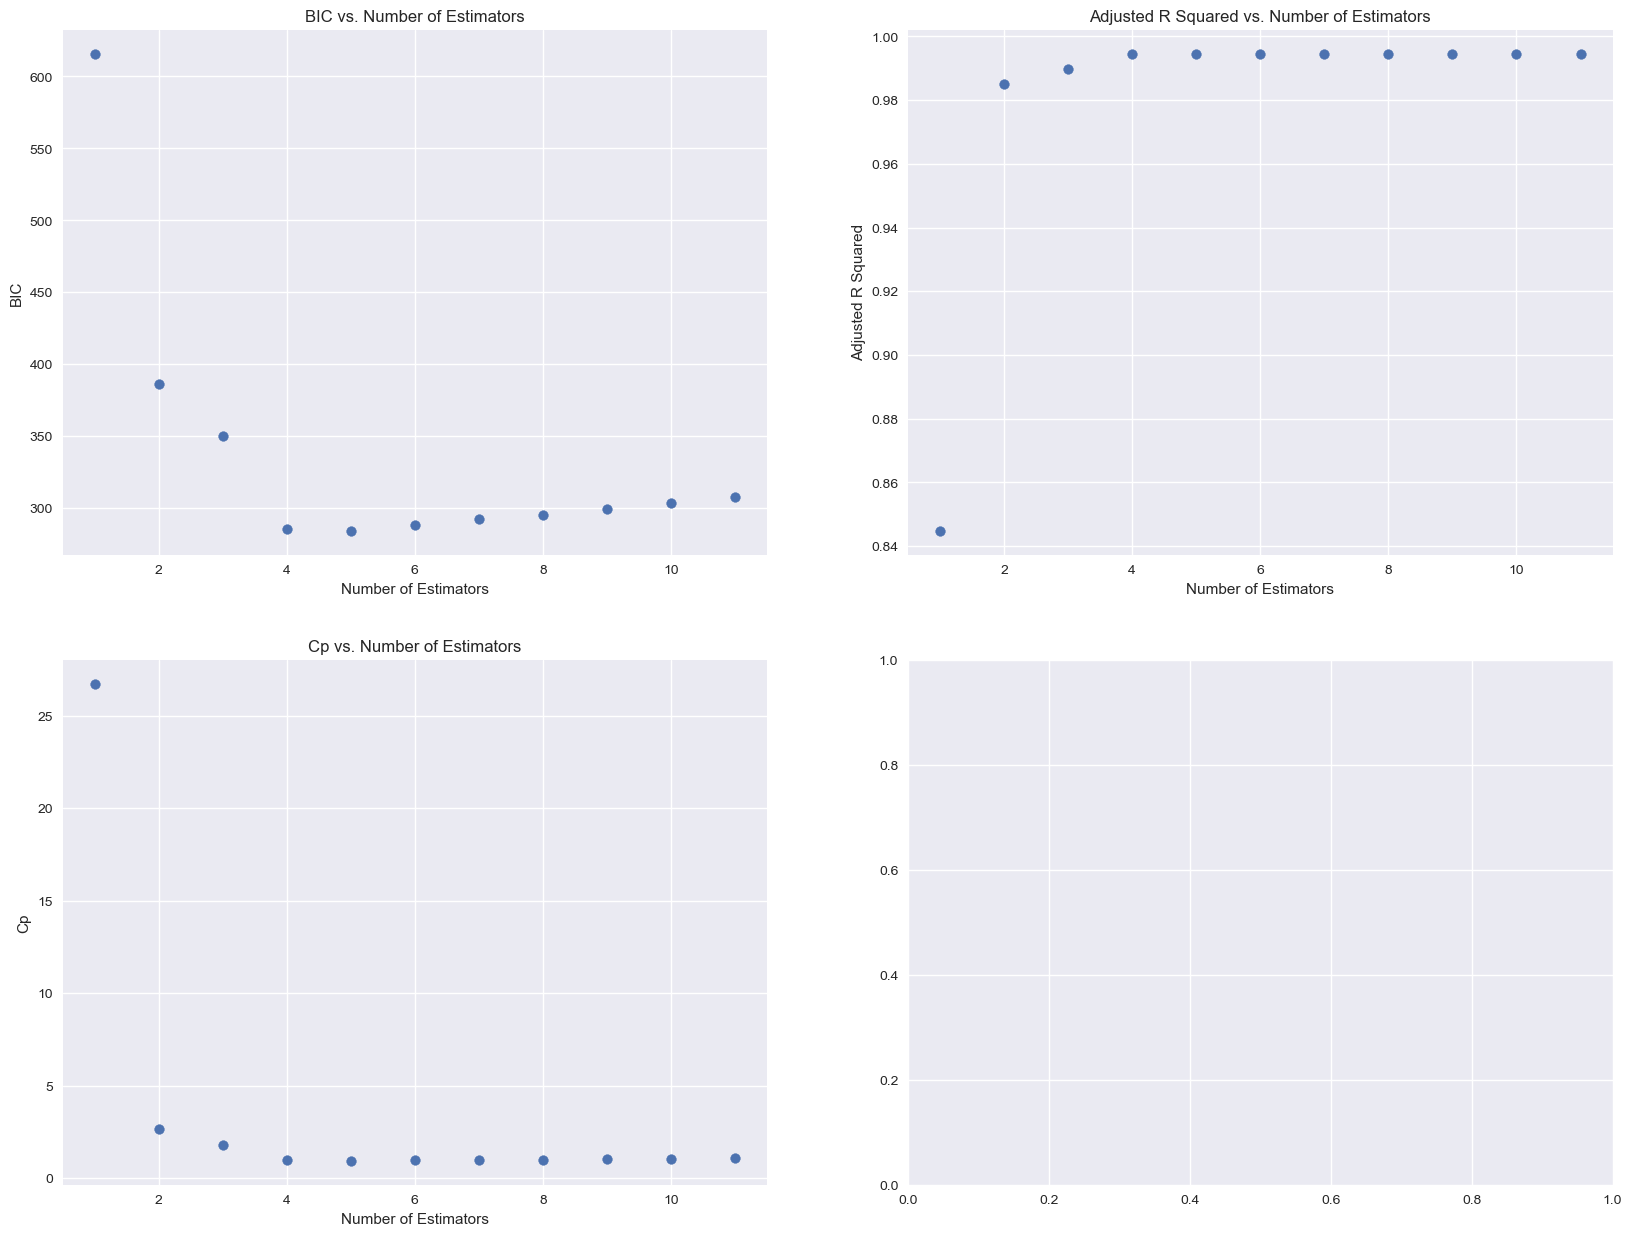

In [129]:
# Find signification parameter to decide which model is the best
BIC
Adj_R_sqare
Cp

# Plot graph        
num_predicts= [1,2,3,4,5,6,7,8,9,10,11]
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(nrows=2, ncols=2)
plt.style.use('seaborn')

#BIC vs. Number of Predictors
ax[0, 0].scatter(num_predicts, BIC)
ax[0, 0].set_ylabel('BIC')
ax[0, 0].set_xlabel('Number of Estimators')
ax[0, 0].set_title('BIC vs. Number of Estimators')

#Adjusted R Squared vs. Number of Predictors
ax[0, 1].scatter(num_predicts, Adj_R_sqare)
ax[0, 1].set_ylabel('Adjusted R Squared')
ax[0, 1].set_xlabel('Number of Estimators')
ax[0, 1].set_title('Adjusted R Squared vs. Number of Estimators')

#Cp vs. Number of Predictors
ax[1, 0].scatter(num_predicts, Cp)
ax[1, 0].set_ylabel('Cp')
ax[1, 0].set_xlabel('Number of Estimators')
ax[1, 0].set_title('Cp vs. Number of Estimators')

# position of each best parameter are at 4
print(BIC.index(np.min(BIC)))
print(BIC)
print(Adj_R_sqare.index(np.max(Adj_R_sqare)))
print(Adj_R_sqare)
print(Cp.index(np.min(Cp)))
print(Cp)

It is clear from all three graphs that when the number of estimators that shows the best value of BIC, Adjust R-squared, and Cp is 5 estimators. This means that with only 4 variables and 1 constant are good enough to explain our target model. Those models are reported below:

In [7]:
print(results[index_best_r2[4]].summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4574.
Date:                Sat, 11 Feb 2023   Prob (F-statistic):          1.14e-107
Time:                        22:02:51   Log-Likelihood:                -130.61
No. Observations:                 100   AIC:                             271.2
Df Residuals:                      95   BIC:                             284.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2769      0.128      9.986      0.0

(d) Do the same using forward stepwise and backward stepwise selection. How does your answer compare to the results in (c)?

Resule from (c)

In [8]:
print(results[index_best_r2[4]].summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4574.
Date:                Sat, 11 Feb 2023   Prob (F-statistic):          1.14e-107
Time:                        22:02:51   Log-Likelihood:                -130.61
No. Observations:                 100   AIC:                             271.2
Df Residuals:                      95   BIC:                             284.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2769      0.128      9.986      0.0

- Forward Stepwise Selection

In [9]:
threshold = 0.01
included = []
predictors = df.drop("y", axis = 1)
predictors = sm.add_constant(predictors) 

while True:
    best_r2 = 0.0
    best_predictor = None
# Searching the best predictor based on r square    
    for predictor in predictors.columns:
        if predictor not in included:
            X = predictors[included + [predictor]]
#             print("X is",X)
            model = sm.OLS(df['y'], X)
            results1 = model.fit()
            r2 = results1.rsquared
            if r2 - best_r2 > threshold:
                best_r2 = r2
                best_predictor = predictor
#                 print("Best r2",best_r2)
#                 print("Best predictor", best_predictor)

    if best_predictor is None:
        break
    included.append(best_predictor)
    
X = predictors[included]
sm.OLS(df['y'], X).fit()
print(results1.summary())   


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1788.
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           5.19e-98
Time:                        22:02:51   Log-Likelihood:                -128.50
No. Observations:                 100   AIC:                             279.0
Df Residuals:                      89   BIC:                             307.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x3             2.0606      1.599      1.288      0.2

- Backward Stepwise Selection

In [10]:
threshold = 0.01
included = list(predictors.columns)
predictors = df.drop("y", axis = 1)
predictors = sm.add_constant(predictors) 

while True:
    worst_r2 = 1
    worst_predictor = None
# Searching the best predictor based on r square    
    for predictor in included:
        X = predictors[included].drop(predictor, axis=1)
#       print("X is",X)
        model = sm.OLS(df['y'], X)
        results2 = model.fit()
        r2 = results2.rsquared
        if r2 - worst_r2 < -threshold:
            worst_r2 = r2
            worst_predictor = predictor
#                 print("Best r2",best_r2)
#                 print("Best predictor", best_predictor)

    if worst_predictor is None:
        break
    included.remove(worst_predictor)
    
X = predictors[included]
sm.OLS(df['y'], X).fit()
print(results2.summary())   


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2000.
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.38e-99
Time:                        22:02:52   Log-Likelihood:                -128.73
No. Observations:                 100   AIC:                             277.5
Df Residuals:                      90   BIC:                             303.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2017      0.174      6.919      0.0

coefficient comparison from each method

(i) Best Subset Selection

In [11]:
list(results[index_best_r2[10]].params)

[1.1503802793569966,
 2.502340921976159,
 4.114580532937275,
 2.0605549695174865,
 -2.432462404476599,
 1.813722057572054,
 1.354130626541103,
 -0.5549850479513481,
 -0.3009016296295819,
 0.054269396571375195,
 0.02425349954102196]

(ii) Forward Step Selection

In [12]:
list(results1.params)
sorted_results1 = [1.1503802793570013,
  2.5023409219760757,
 4.11458053293712,
 2.0605549695177316,
 -2.4324624044769294,
 1.8137220575719155,
 1.3541306265413908,
 -0.5549850479513037,
 -0.30090162962965117,
 0.05426939657137164,
 0.024253499541026624]

(iii) Backward Step Selection

In [13]:
list(results2.params)

[1.2017297194216965,
 2.5351795135067308,
 3.377335603824772,
 1.9079580780533263,
 -0.8758590396761825,
 1.9257409950907416,
 0.2892910482576756,
 -0.5672017594985341,
 -0.02337703252186163,
 0.052974864984654646]

From three methods, the coefficient are close to each others

(e) Now fit a lasso model to the simulated data, again using X,X2, . . . , X 10 as predictors. Use cross-validation to select the optimal value of λ. Create plots of the cross-validation error as a function of λ. Report the resulting coefficient estimates, and discuss the results obtained.

In [135]:
predictors = df.drop('y', axis=1)
response = df['y']
# predictors_train, predictors_test, response_train, response_test = train_test_split(predictors,response, train_size = 0.5, shuffle = True, random_state=2)
param_grid = {'alpha': np.logspace(-2, 10, 100)}
reg = Lasso()
reg_cv = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5)
#reg_cv = GridSearchCV(ridge, param_grid={'alpha': alphas}, cv=LeaveOneOut())
#reg_cv = GridSearchCV(estimator=ridge, param_grid=dict(alpha=alphas), cv= KFold(n_splits=5, shuffle=True))
reg_cv.fit(predictors, response)



GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-02, 1.32194115e-02, 1.74752840e-02, 2.31012970e-02,
       3.05385551e-02, 4.03701726e-02, 5.33669923e-02, 7.05480231e-02,
       9.32603347e-02, 1.23284674e-01, 1.62975083e-01, 2.15443469e-01,
       2.84803587e-01, 3.76493581e-01, 4.97702356e-01, 6.57933225e-01,
       8.69749003e-01, 1.14975700e+00, 1.51991108e+00, 2....
       1.62975083e+07, 2.15443469e+07, 2.84803587e+07, 3.76493581e+07,
       4.97702356e+07, 6.57933225e+07, 8.69749003e+07, 1.14975700e+08,
       1.51991108e+08, 2.00923300e+08, 2.65608778e+08, 3.51119173e+08,
       4.64158883e+08, 6.13590727e+08, 8.11130831e+08, 1.07226722e+09,
       1.41747416e+09, 1.87381742e+09, 2.47707636e+09, 3.27454916e+09,
       4.32876128e+09, 5.72236766e+09, 7.56463328e+09, 1.00000000e+10])})

Text(0.5, 1.0, 'λ vs MSE')

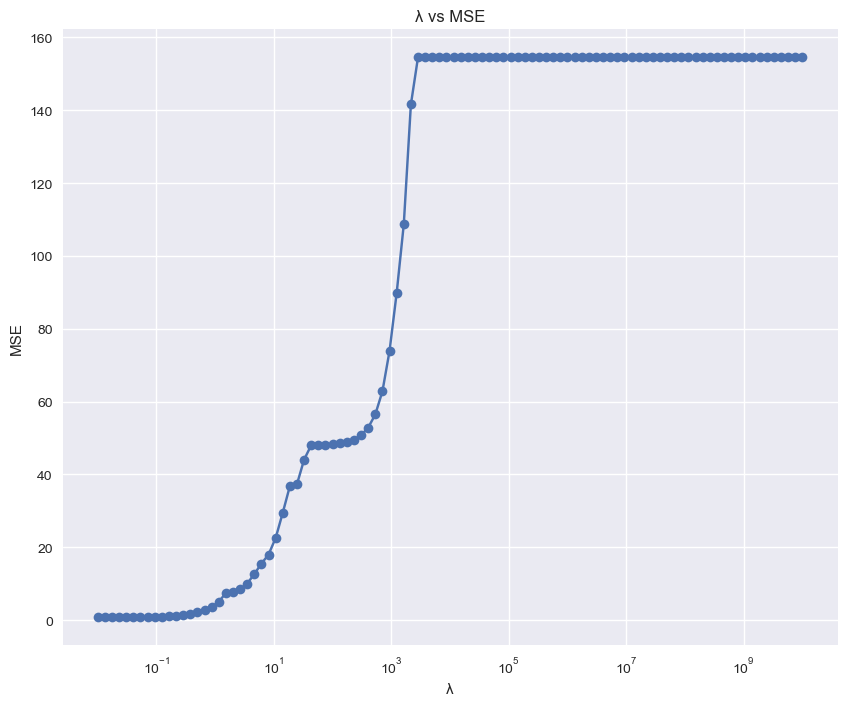

In [136]:
# keep every alphas
alphas = list(param_grid['alpha'])
MSE = []
y_predict = []

# fit lasso to every alpha and get y hat. Then, find MSE between yhat and y
for i in range (0, len(alphas)):
    lasso = Lasso(alpha = alphas[i])
    results = lasso.fit(predictors, response)
    y_predict.append(results.predict(predictors))
    MSE.append(np.mean((response - y_predict[i]) ** 2))
    
plt.rcParams["figure.figsize"] = (10,8)
fig, ax = plt.subplots()
plt.style.use('seaborn')

#lambda vs. Number of Predictors in log scale

ax.plot(alphas, MSE, '-o')
plt.xscale('log')
ax.set_ylabel('MSE')
ax.set_xlabel('λ')
ax.set_title( 'λ vs MSE')
    

This graph show cross validation error

 best λ = 0.030538555088334154

In [137]:
best_alpha = reg_cv.best_params_['alpha']
reg = Lasso(alpha=best_alpha)
reg.fit(predictors, response)
print(best_alpha)

0.030538555088334154


In [126]:
# response_pred = reg.predict(predictors_test)
# print("Mean Squared Error:", np.mean((response_test- response_pred) ** 2))

reg.intercept_

1.3903849431523807

In [127]:
reg.coef_

array([ 1.88457596e+00,  2.31439222e+00,  3.99294565e+00,  4.63310967e-02,
        5.87888706e-02,  5.55905140e-02, -0.00000000e+00,  0.00000000e+00,
       -1.64944782e-03, -1.34299585e-03])

y =1 + 2*x + 3*(x)**2 + 4*(x**3) + noise

Beta 0 = 1
Beta 1 = 2
Beta 2 = 3
Beta 3 = 4

Lasso help model sparsity by push 2 variables to true zero, and 5 variables get close to zero, while the coefficient of the best model, in this case, x1, x2, x3, are well estimated by Lasso

As you can see,

Beta 0 hat = 1.39, while Beta 0 = 1

Beta 1 hat = 1.88, while Beta 1 = 2

Beta 2 hat = 2.31, while Beta 2 = 3

Beta 3 hat = 3.99, while Beta 3 = 4

Beta 7 and 8 are pushed to zero and the rest are pushed close to zero